In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#template matching

In [4]:
#To start, you will need a main image, and a template.

In [5]:
img_rgb = cv2.imread('img1.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('img2.jpg',0)
w, h = template.shape[::-1]

In [6]:
w

19

In [7]:
h

22

In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(template)

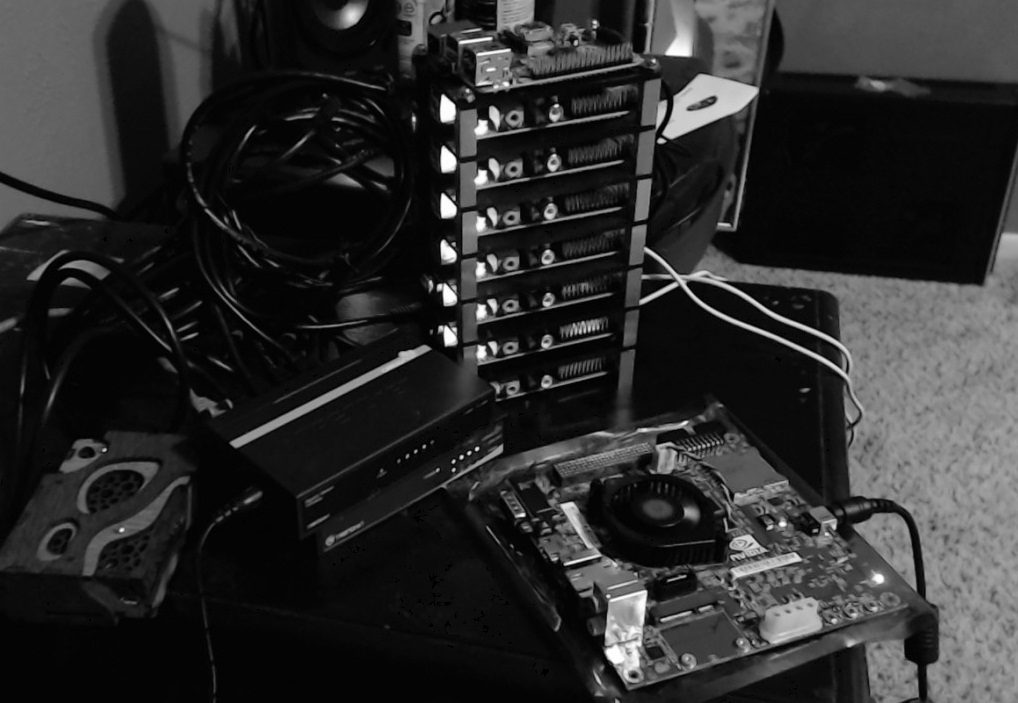

In [11]:
cv2_imshow(img_gray)

In [13]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#for exp 0.8
threshold = 0.8
loc = np.where( res >= threshold)

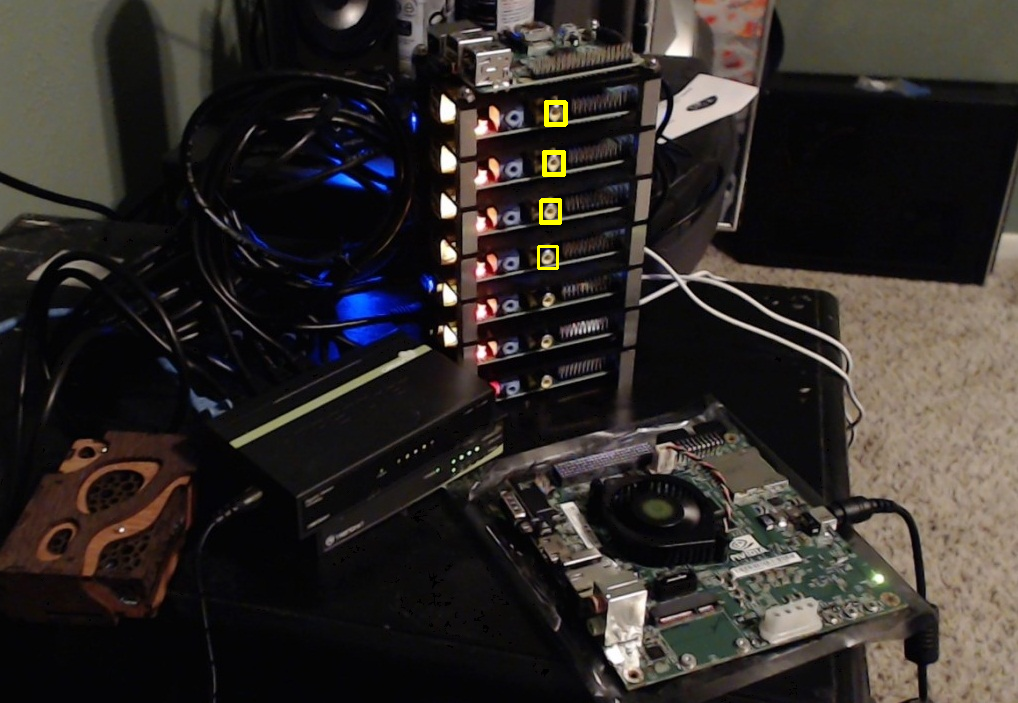

In [14]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2_imshow(img_rgb)

In [15]:
#il identifie 3 zones seulement , ce n'est pas mauvais mais on va essayer avec threshold = 0.7

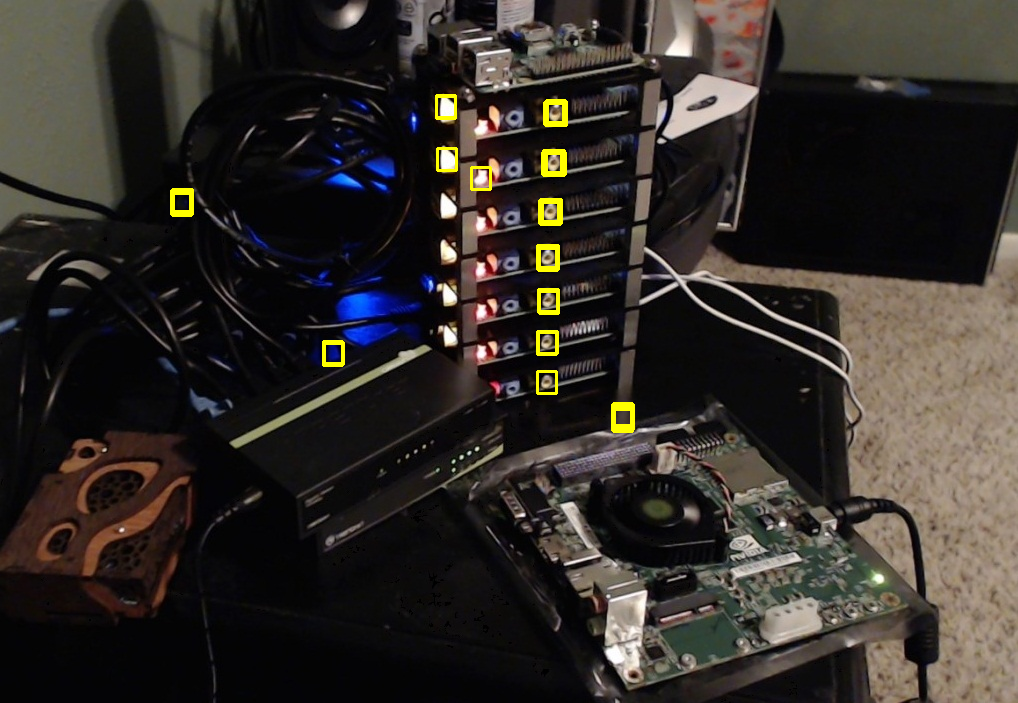

In [16]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#for exp 0.7
threshold = 0.7
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2_imshow(img_rgb)

In [17]:
#il identifie tous les positions mais ilya aussi des fausses position

In [18]:
img = cv2.imread('img3.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

In [21]:
# This is rect = (start_x, start_y, width, height)
#il est fixé selon l'image

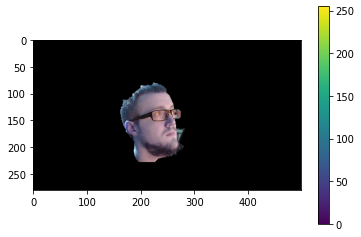

In [20]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [22]:
#Corner detection

In [24]:
img = cv2.imread('img4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
#detect the corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

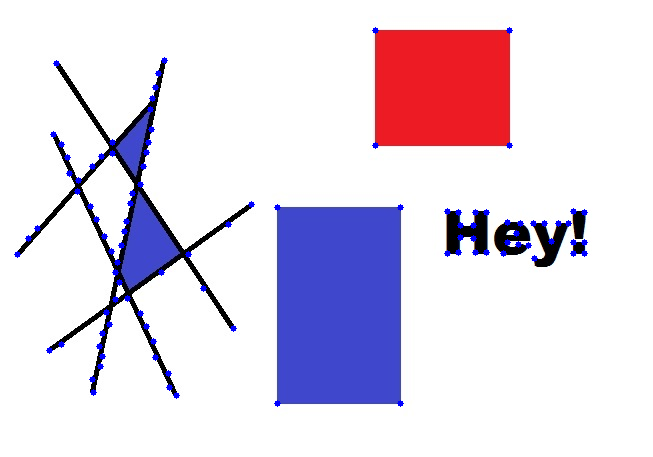

In [26]:
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
cv2_imshow(img)

In [27]:
#comme l'image est trés clair , lerésultat est parfait

In [28]:
#Feature matching

In [29]:
img1 = cv2.imread('img5.jpg',0)
img2 = cv2.imread('img6.jpg',0)

In [35]:
#the detector :

In [30]:
orb = cv2.ORB_create()

In [31]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [32]:
#key points
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [33]:
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

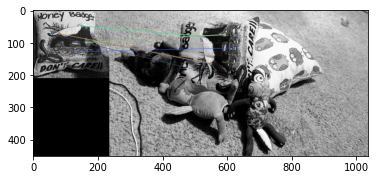

In [34]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

In [36]:
# MOG background

In [37]:
#on va utiliser un video

In [38]:
#The idea here is to extract the moving forground from the static background. 
#You can also use this to compare two similar images, and immediately extract the differences between them.

In [ ]:
cap = cv2.VideoCapture('people-walking.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2_imshow(frame)
    cv2_imshow(fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()